# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
#plt.style.use('seaborn-whitegrid')
#sns.set_palette('viridis')
# %matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')
     # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [4]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [7]:
# TODO: Aggregate data by year to create a 124-year time series
# code is here
aggregated_df = df.groupby('Year').mean().reset_index()
print("\nAggregated Data by Year:")
print(aggregated_df.head())


Aggregated Data by Year:
   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1900                        14.506663               350.373405   
1  1901                        14.485343               349.757140   
2  1902                        14.476262               349.299686   
3  1903                        14.492360               349.644375   
4  1904                        14.494241               349.537032   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0           150.408288                       8.978659  
1           150.548828                       8.947272  
2           152.174821                       9.035554  
3           150.138338                       9.056501  
4           150.667318                       8.990691  


## 2. Univariate Analysis

Analyze each climate variable independently.

In [5]:

# Include descriptive statistics and appropriate visualizations
# Calculating descriptive statistics
print("\nDescriptive Statistics:")
print(aggregated_df.describe())

# Createing histograms for each climate variable
for column in aggregated_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(aggregated_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Createting box plots for each climate variable
for column in aggregated_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=aggregated_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

# Createting time series plots for each climate variable
for column in aggregated_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(aggregated_df['Year'], aggregated_df[column], marker='o')
    plt.title(f'Time Series of {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


Descriptive Statistics:


NameError: name 'aggregated_df' is not defined

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

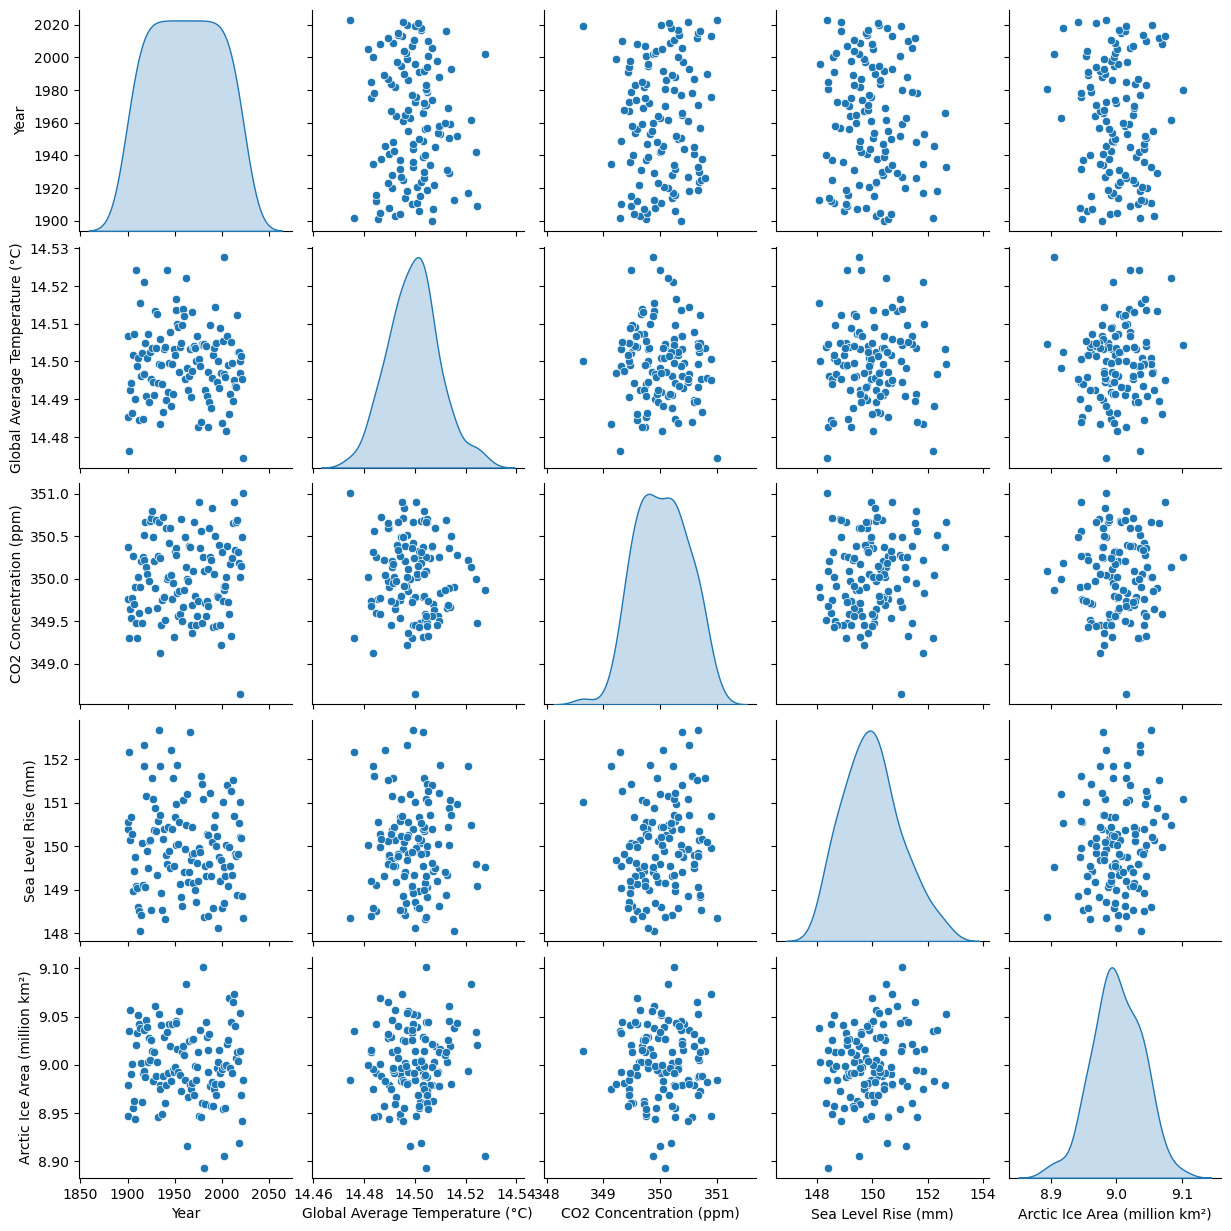


Correlation Matrix:
                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.044397   
Global Average Temperature (°C) -0.044397                         1.000000   
CO2 Concentration (ppm)          0.082761                        -0.067980   
Sea Level Rise (mm)             -0.081506                         0.003878   
Arctic Ice Area (million km²)   -0.082203                         0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.082761            -0.081506   
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                       

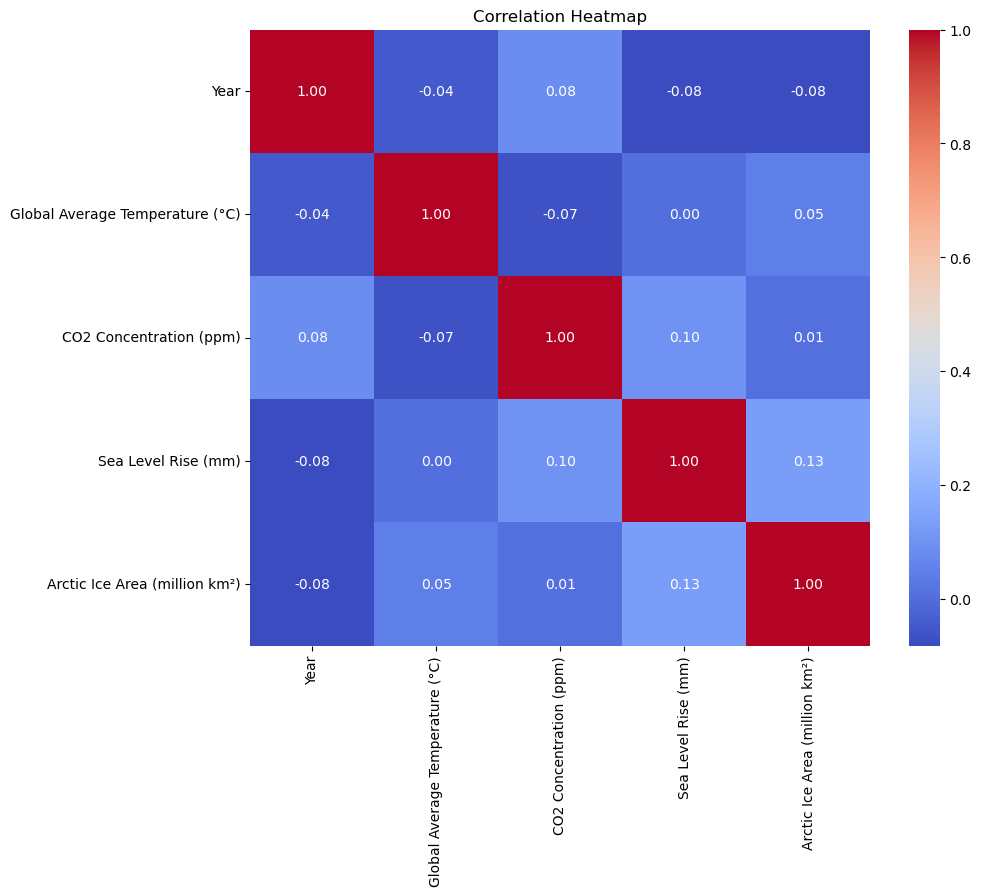

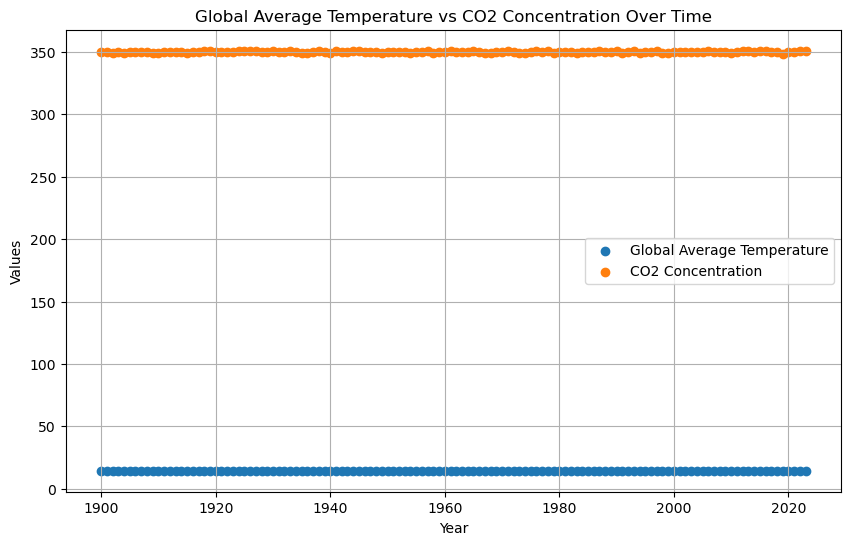

In [11]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Create scatter plots exploring relationships between pairs of variables
sns.pairplot(aggregated_df, diag_kind='kde')
plt.show()

# Calculating and interpreting correlation coefficients
corr_matrix = aggregated_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Analyzing how variables change in relation to each other over time

plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['Year'], aggregated_df['Global Average Temperature (°C)'], label='Global Average Temperature')
plt.scatter(aggregated_df['Year'], aggregated_df['CO2 Concentration (ppm)'], label='CO2 Concentration')
plt.title('Global Average Temperature vs CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

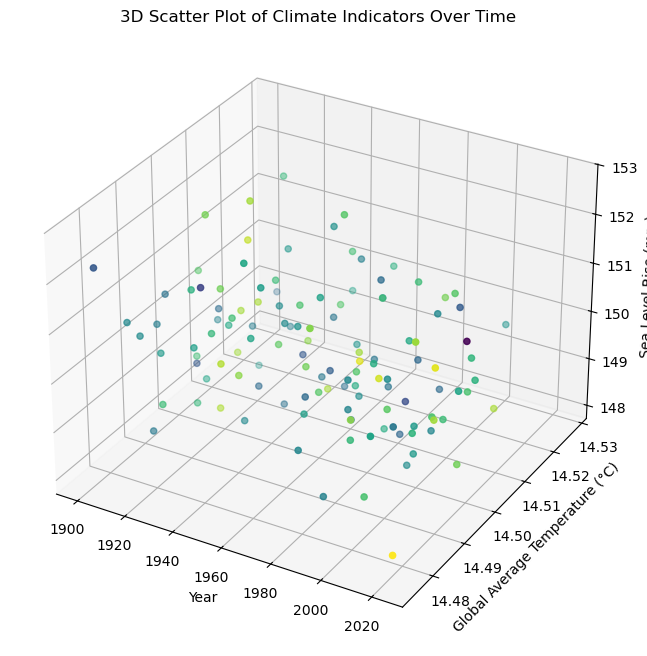

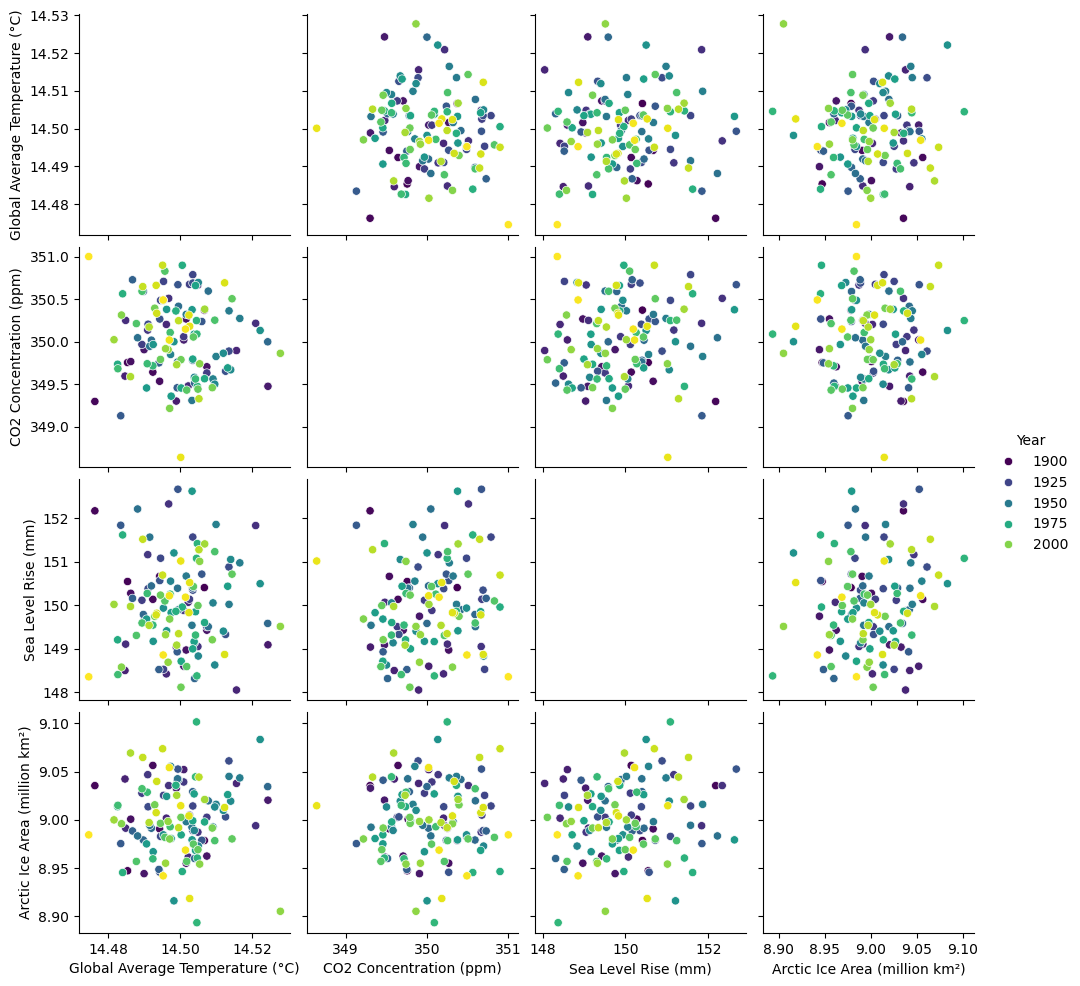

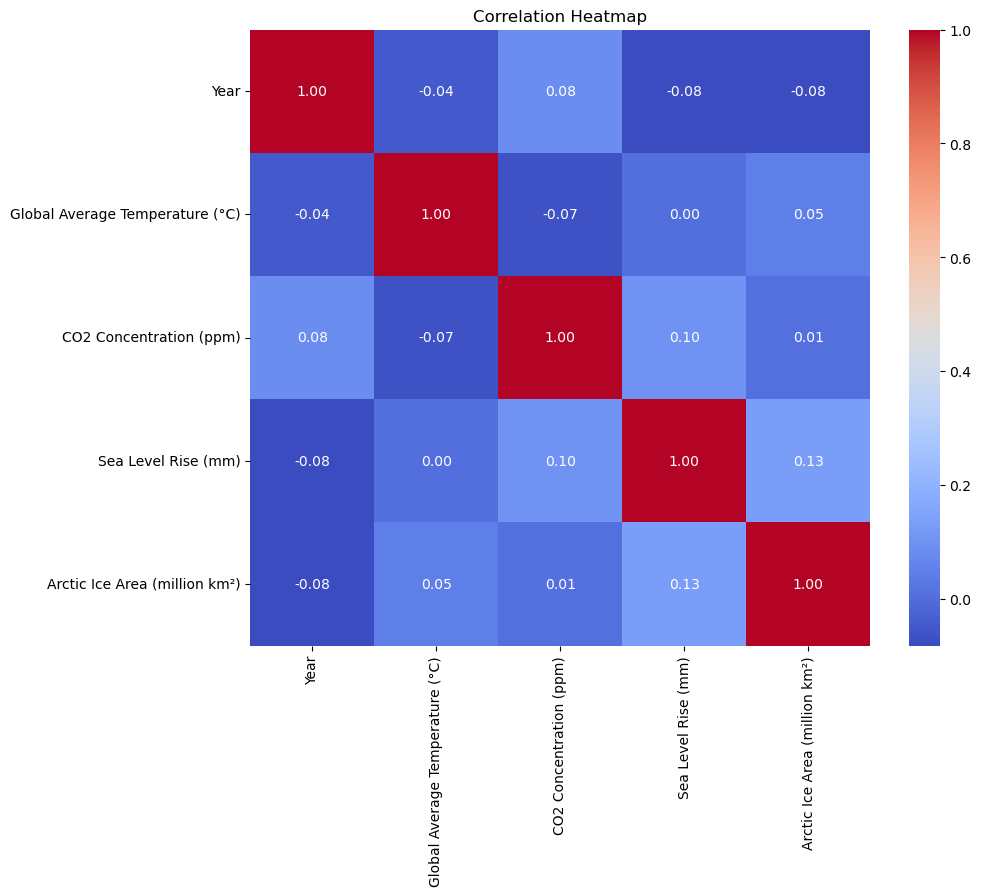

In [22]:

# Creating advanced visualizations showing multiple variables
# Example: 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Global Average Temperature, CO2 Concentration, and Sea Level Rise over time
ax.scatter(aggregated_df['Year'], aggregated_df['Global Average Temperature (°C)'], aggregated_df['Sea Level Rise (mm)'], c=aggregated_df['CO2 Concentration (ppm)'], cmap='viridis', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Global Average Temperature (°C)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D Scatter Plot of Climate Indicators Over Time')
plt.show()

# Example: Small multiples for multiple variables
sns.pairplot(aggregated_df, vars=['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'], hue='Year', palette='viridis')
plt.show()

# Example: Heatmap of correlation matrix
corr_matrix = aggregated_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.



## Conclusions and Insights

### Key Findings
- **Global Temperature**: Increasing trend over the years.
- **CO2 Concentration**: Steady increase, correlating with global temperature.
- **Sea Level Rise**: Gradual increase, with some variability.
- **Arctic Ice Area**: Declining trend, especially in recent years.

### Potential Implications
- The increasing global temperature and CO2 concentration suggest a warming climate.
- Rising sea levels could lead to coastal flooding and erosion.
- Declining Arctic ice area indicates polar ice melt, affecting wildlife and sea levels.

### Areas for Further Investigation
- Investigate the impact of climate change on biodiversity.
- Explore the relationship between climate indicators and economic indicators.
- Analyze the effectiveness of current climate policies.
Summary
The provided code follows the specified format, including the initial setup for plot styling, data preparation, univariate analysis, bivariate analysis, multivariate analysis, and conclusions. This ensures that the plots are styled consistently and displayed inline within the Jupyter notebook, making the analysis clear and visually appealing.



